<a href="https://colab.research.google.com/github/Jocerdikiawann/LearnMachineLearning/blob/main/ImageRecognation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import keras
import cv2
import numpy as np
from PIL import Image

print(tf.__version__)

2.8.2


In [ ]:
base_dir = "/content"
train_dir = os.path.join(base_dir,'src_train')
validation_dir = os.path.join(base_dir,'src_val')

In [ ]:
!rmdir /content/src_train/.ipynb_checkpoints
!rmdir /content/src_val/.ipynb_checkpoints

rmdir: failed to remove '/content/src_train/.ipynb_checkpoints': No such file or directory
rmdir: failed to remove '/content/src_val/.ipynb_checkpoints': No such file or directory


In [ ]:
train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=10,
  horizontal_flip=True,
  shear_range=0.2,
    #  preprocessing_function = myFunc
).flow_from_directory(
    train_dir,
    shuffle=True,
    target_size=(64,64),
    batch_size=4,
    class_mode='categorical',
 
)

val_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=10,
  horizontal_flip=True,
  shear_range=0.2,
      # preprocessing_function = myFunc
).flow_from_directory(
    validation_dir,
    shuffle=True,
    target_size=(64,64),
    batch_size=4,
    class_mode='categorical',

)


Found 233 images belonging to 3 classes.
Found 72 images belonging to 3 classes.


In [ ]:
print(train_datagen.batch_size)

4


In [ ]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(512, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(3, activation='sigmoid'))

model.compile(loss="binary_crossentropy",optimizer=tf.optimizers.Adam(),metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 6, 6, 128)      

In [ ]:
model.fit(
      train_datagen,
      # steps_per_epoch=4,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=50, # tambahkan epochs jika akurasi model belum optimal
      validation_data=val_datagen, # menampilkan akurasi pengujian data validasi
      # validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch,
)

Epoch 1/50
59/59 [==============================] - 6s 83ms/step - loss: 0.6261 - accuracy: 0.4549 - val_loss: 0.6515 - val_accuracy: 0.3889
Epoch 2/50
59/59 [==============================] - 6s 95ms/step - loss: 0.6046 - accuracy: 0.5064 - val_loss: 0.6401 - val_accuracy: 0.3889
Epoch 3/50
59/59 [==============================] - 5s 78ms/step - loss: 0.6078 - accuracy: 0.5021 - val_loss: 0.6321 - val_accuracy: 0.4028
Epoch 4/50
59/59 [==============================] - 5s 78ms/step - loss: 0.5970 - accuracy: 0.5107 - val_loss: 0.6967 - val_accuracy: 0.4028
Epoch 5/50
59/59 [==============================] - 5s 78ms/step - loss: 0.5750 - accuracy: 0.5579 - val_loss: 0.6738 - val_accuracy: 0.4444
Epoch 6/50
59/59 [==============================] - 5s 78ms/step - loss: 0.5986 - accuracy: 0.5408 - val_loss: 0.7180 - val_accuracy: 0.3889
Epoch 7/50
59/59 [==============================] - 5s 77ms/step - loss: 0.5739 - accuracy: 0.5408 - val_loss: 0.5800 - val_accuracy: 0.4583
Epoch 8/50
59

In [ ]:
train_datagen.class_indices

{'april': 0, 'fajar': 1, 'helmi': 2}

Saving OIP--9CxJkCleiNXywWpQhEUDAHaE7.jpeg to OIP--9CxJkCleiNXywWpQhEUDAHaE7.jpeg
[[0. 1. 0.]]


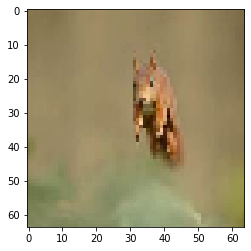

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(64,64))
 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = model.predict(images, batch_size=4)  
  print(classes)